# 아이리스 다중 분류

In [1]:
import numpy as np
import tensorflow as tf

seed=2021
np.random.seed(seed)
tf.random.set_seed(seed)

### 데이터 전처리

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(iris.data)

In [4]:
# One-hot encoding
from tensorflow.keras.utils import to_categorical
Y = to_categorical(iris.target)
Y[:3]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_norm, Y, stratify=Y, random_state=2021
)
X_train.shape, X_test.shape, Y_train.shape

((112, 4), (38, 4), (112, 3))

### 모델 정의/설정/학습/평가

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
# 다중분류 - 출력층의 노드 갯수, 활성화 함수
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [18]:
# 다중분류 - 손실 함수: categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=500, batch_size=30, verbose=0)

In [20]:
acc = model.evaluate(X_test, Y_test)
print(f'정확도: {acc[1]:.4f}')

2/2 [==============================] - 0s 7ms/step - loss: 0.0978 - accuracy: 0.9474
정확도: 0.9474


### 훈련과정 시각화

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# 검증셋의 오차
y_vloss = history.history['val_loss']
# 학습셋의 정확도
y_acc = history.history['accuracy']

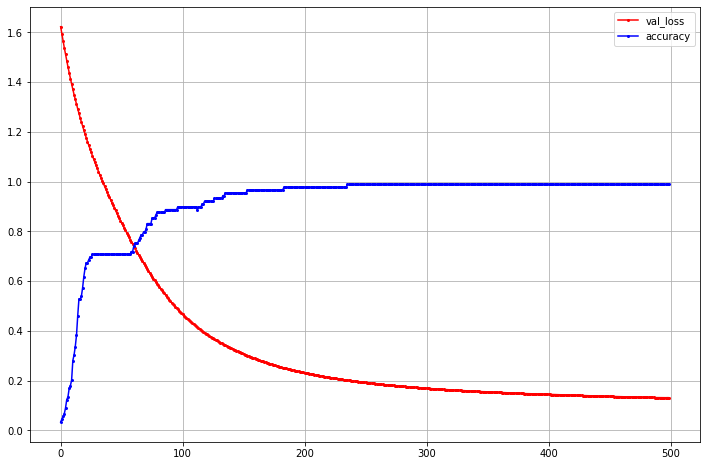

In [23]:
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,8))
plt.plot(x_len, y_vloss, 'ro-', markersize=2, label='val_loss')
plt.plot(x_len, y_acc, 'bo-', markersize=2, label='accuracy')
plt.legend()
plt.grid()
plt.show()